### Spot the peak

In this notebook, we look at whether we can detect a peak in noisy data. This is a common problem in physics - if we know the experimental apparatus available, and the size of the effect we're looking for, is there any hope of seeing it?

In [1]:
import numpy as np
from math import *
from scipy import stats 
import matplotlib.pyplot as plt

### Creating the data

We will use a trick called synthetic data: it basically means we make up data before actually doing the experiment, to test our methods.  Here we assume a white noise background and a gaussian peak, we plot this: the blue line shows the signal, the red is the data: just looking at the red, do you think there is a peak?

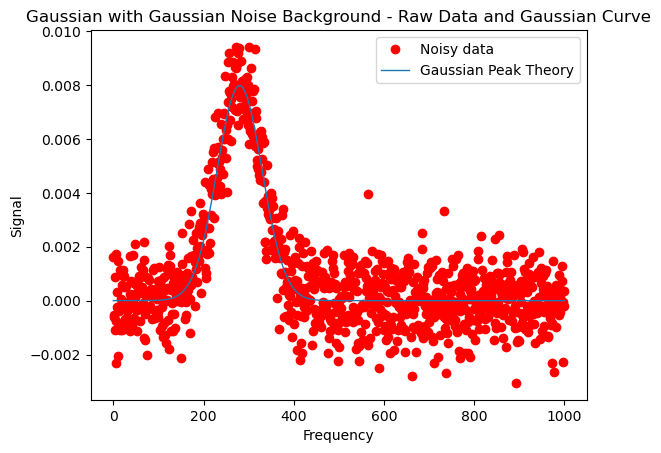

In [2]:


# Set random seed for reproducibility
np.random.seed(1)

 # Parameters for the Gaussian and white noise background
gaussian_mean = 280
gaussian_std = 50
gaussian_amp=1.0
noise_level = 0.001#0.05
data_size = 1000 
    # Generate gaussian noise background
noise_data = np.random.normal(0, noise_level, data_size)

# Plot the Gaussian curve
xmin= 0 
xmax =data_size 
x = np.linspace(xmin, xmax, data_size)

peak = stats.norm.pdf(x, gaussian_mean, gaussian_std)*gaussian_amp


ydata=peak+noise_data

# Generate data

# Plot the raw data using a scatter plot
#plt.scatter(range(len(data)), data, color='blue', alpha=0.7, label='Generated Data')

plt.plot(x, ydata,  'o-r',  linewidth=0,label='Noisy data ')
plt.plot(x, peak,  linewidth=1,label='Gaussian Peak Theory')
plt.title('Gaussian with Gaussian Noise Background - Raw Data and Gaussian Curve')
plt.xlabel('Frequency')
plt.ylabel('Signal')
plt.legend()
plt.show()


## Running the test

We assume the width and amplitude of the gaussian is known, but the centre is not.  We therefore loop over possible positions for the centre, theta, and evaluated the ln(likelihood), aka chi-squared with constant variance

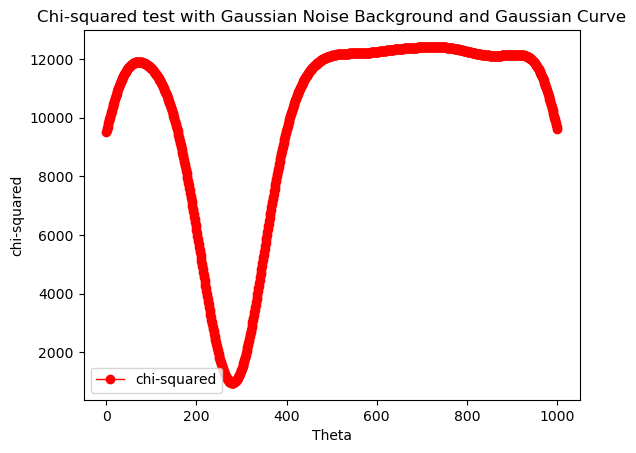

measured minimum value of chisquared is at theta= 279 Actual value= 280 chisquared= 963.4135185441488


In [3]:
chitheta= np.zeros(data_size)
g_theta=x
for theta in range(xmin,xmax):
    sqfit=0.0
    g_theta=stats.norm.pdf(x, theta, gaussian_std)*gaussian_amp
    for index in  range(xmin,xmax):
        sqfit=sqfit+(ydata[index]-g_theta[index])**2
    chitheta[theta]=sqfit

    
plt.plot(x, chitheta/noise_level/noise_level,  'o-r',  linewidth=1,label='chi-squared')
plt.title('Chi-squared test with Gaussian Noise Background and Gaussian Curve')
plt.xlabel('Theta')
plt.ylabel('chi-squared')
plt.legend()
plt.show()
print("measured minimum value of chisquared is at theta=",np.argmin(chitheta), 
      "Actual value=",gaussian_mean, "chisquared=",np.min(chitheta)/noise_level/noise_level)

For the bast model, the absolute values of chisquared is dominanted by the tail. $\exp(\chi^2) $, maximum Likelihood might be better 

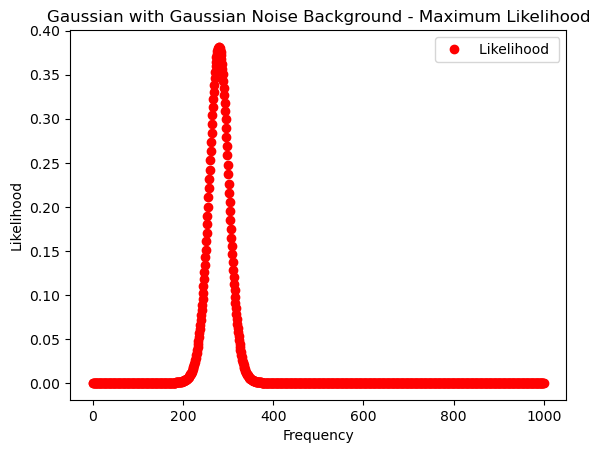

In [12]:
plt.plot(x, np.exp(-chitheta/noise_level),  'o-r',  linewidth=0,label='Likelihood ')
plt.title('Gaussian with Gaussian Noise Background - Maximum Likelihood')
plt.xlabel('Frequency')
plt.ylabel('Likelihood')
plt.legend()
plt.show()

In [8]:
ydata


array([ 1.62434660e-03, -6.11755031e-04, -5.28170206e-04, -1.07296689e-03,
        8.65409559e-04, -2.30153654e-03,  1.74481417e-03, -7.61204217e-04,
        3.19042089e-04, -2.49367038e-04,  1.46211166e-03, -2.06013657e-03,
       -3.22412591e-04, -3.84049221e-04,  1.13377515e-03, -1.09988491e-03,
       -1.72421145e-04, -8.77850570e-04,  4.22224647e-05,  5.82824894e-04,
       -1.10060843e-03,  1.14473563e-03,  9.01603941e-04,  5.02508995e-04,
        9.00872191e-04, -6.83709868e-04, -1.22870305e-04, -9.35747386e-04,
       -2.67863686e-04,  5.30382445e-04, -6.91630928e-04, -3.96720570e-04,
       -6.87136296e-04, -8.45165445e-04, -6.71201766e-04, -1.26156519e-05,
       -1.11725637e-03,  2.34475205e-04,  1.65986775e-03,  7.42116391e-04,
       -1.91756021e-04, -8.87541430e-04, -7.47061990e-04,  1.69256051e-03,
        5.09241815e-05, -6.36867710e-04,  1.91056014e-04,  2.10040943e-03,
        1.20328302e-04,  6.17388903e-04,  3.00374073e-04, -3.52026488e-04,
       -1.14227344e-03, -